In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC as svc
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



In [2]:
df = pd.read_csv('BankNote_Authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
print('Observations per class: \n', df['class'].value_counts())

Observations per class: 
 0    762
1    610
Name: class, dtype: int64


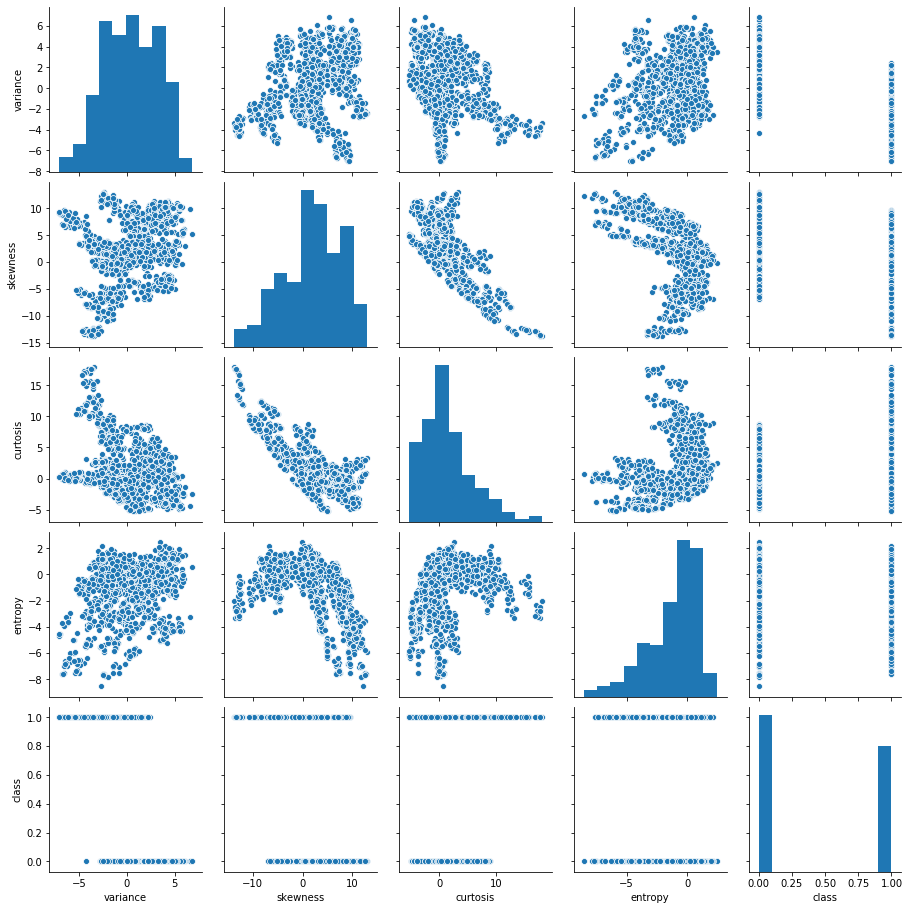

In [6]:
sns.pairplot(df) 

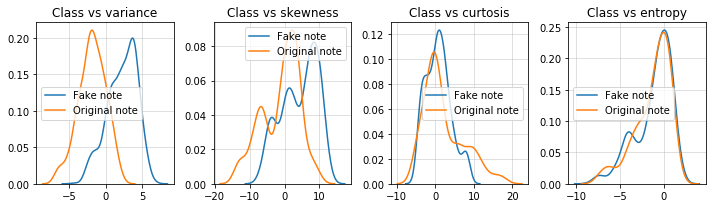

In [7]:
col_names = df.drop('class', axis = 1).columns.tolist()

plt.figure(figsize = (10,3))
i = 0
for col in col_names:
    plt.subplot(1,4,i+1)
    plt.grid(True, alpha =0.5)
    sns.kdeplot(df[col][df['class'] ==0], label = 'Fake note')
    sns.kdeplot(df[col][df['class'] ==1], label = 'Original note')
    plt.title('Class vs ' + col)
    plt.tight_layout()
    i+=1

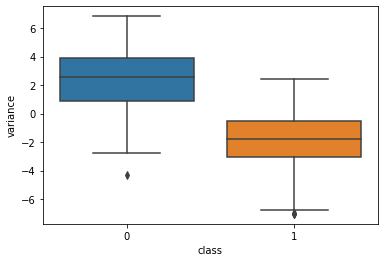

In [8]:
x = df['class']
y =df['variance']
ax = sns.boxplot(x, y)

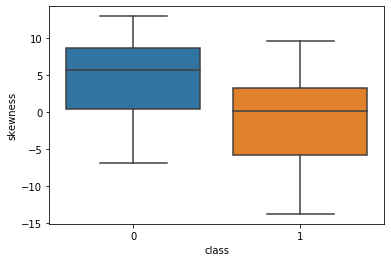

In [9]:
x = df['class']
y =df['skewness']
ax = sns.boxplot(x, y)

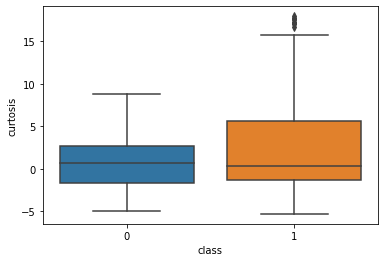

In [10]:
x = df['class']
y =df['curtosis']
ax = sns.boxplot(x, y)

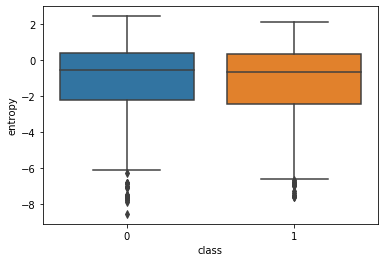

In [11]:
x = df['class']
y =df['entropy']
ax = sns.boxplot(x, y)

In [12]:
#covarience matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [13]:
features = df.iloc[:, 0:4].values 
labels = df.iloc[:, 4].values 

In [14]:
train_features,test_features,train_labels,test_labels =train_test_split(features,labels,test_size=0.2,random_state=21) 

svc_object = svc(kernel='poly', degree=3) 
svc_object.fit(train_features, train_labels)

predicted_labels = svc_object.predict(test_features)

print(classification_report(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels)) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       153
           1       0.97      1.00      0.98       122

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

[[149   4]
 [  0 122]]
0.9854545454545455


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 257.44, 'Predicted label')

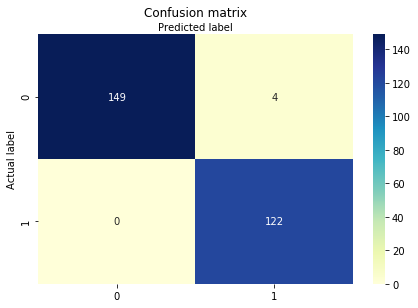

In [15]:
cnf_matrix = confusion_matrix(test_labels, predicted_labels)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
TP =cnf_matrix[0][0]
FP =cnf_matrix[0][1]
FN =cnf_matrix[1][0]
TN = cnf_matrix[1][1]
print('TP is : ', TP)
print('FP is : ', FP)
print('TN is : ', TN)
print('FN is : ', FN)

P=TP+FP
N=TN+FN
specificity=TN/N
sensitivity=TP/P
print('specificity is : ', specificity)
print('sensitivity is : ', sensitivity)

print('False Positive Rate (FPR) is : ', FP/N)
print('False Negative Rate (FNR) is : ', FN/P)
print('Negative Predictive Value (NPV) is : ', TN/(TN+FN))
print('False Discovery Rate (FDR) is : ', FP/(FP+TP))

TP is :  149
FP is :  4
TN is :  122
FN is :  0
specificity is :  1.0
sensitivity is :  0.9738562091503268
False Positive Rate (FPR) is :  0.03278688524590164
False Negative Rate (FNR) is :  0.0
Negative Predictive Value (NPV) is :  1.0
False Discovery Rate (FDR) is :  0.026143790849673203


In [17]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(test_labels, predicted_labels)

0.9710510486161736

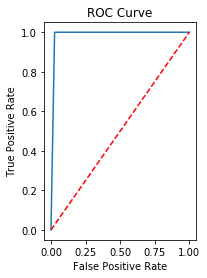

In [18]:
fpr, tpr, threshold = roc_curve(test_labels, predicted_labels)
plt.subplot(1,2,2)
sns.lineplot(fpr, tpr)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

1st max value of 0.992 occured at C=0.200


Text(0, 0.5, 'recall score')

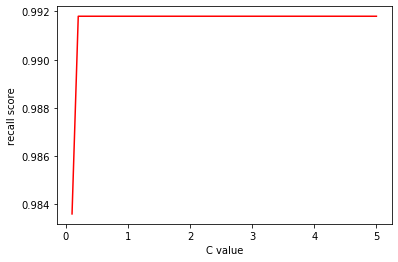

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(train_features, train_labels)
    lr_predict_loop_test = lr_model_loop.predict(test_features)
    recall_score = metrics.recall_score( test_labels, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-",color='r')
plt.xlabel("C value")
plt.ylabel("recall score")


In [20]:
from sklearn.linear_model import LogisticRegression
lr_object = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear', max_iter=10000) 
lr_object.fit(train_features, train_labels)

predicted_labels = lr_object.predict(test_features)

print(classification_report(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       153
           1       0.98      0.99      0.98       122

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9854545454545455
[[150   3]
 [  1 121]]


Text(0.5, 257.44, 'Predicted label')

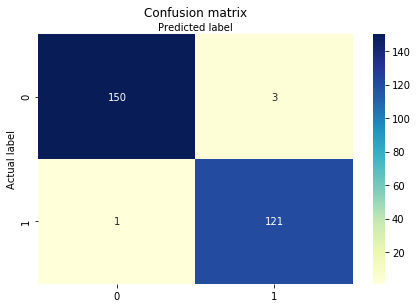

In [21]:
cnf_matrix = confusion_matrix(test_labels, predicted_labels)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [22]:
TP =cnf_matrix[0][0]
FP =cnf_matrix[0][1]
FN =cnf_matrix[1][0]
TN = cnf_matrix[1][1]
print('TP is : ', TP)
print('FP is : ', FP)
print('TN is : ', TN)
print('FN is : ', FN)

P=TP+FP
N=TN+FN
specificity=TN/N
sensitivity=TP/P
print('specificity is : ', specificity)
print('sensitivity is : ', sensitivity)

print('False Positive Rate (FPR) is : ', FP/N)
print('False Negative Rate (FNR) is : ', FN/P)
print('Negative Predictive Value (NPV) is : ', TN/(TN+FN))
print('False Discovery Rate (FDR) is : ', FP/(FP+TP))

TP is :  150
FP is :  3
TN is :  121
FN is :  1
specificity is :  0.9918032786885246
sensitivity is :  0.9803921568627451
False Positive Rate (FPR) is :  0.02459016393442623
False Negative Rate (FNR) is :  0.006535947712418301
Negative Predictive Value (NPV) is :  0.9918032786885246
False Discovery Rate (FDR) is :  0.0196078431372549


In [23]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(test_labels, predicted_labels)

0.9706885174306206

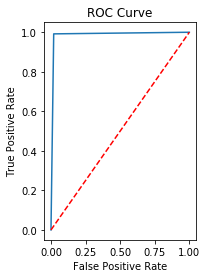

In [24]:
fpr, tpr, threshold = roc_curve(test_labels, predicted_labels)
plt.subplot(1,2,2)
sns.lineplot(fpr, tpr)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 60:40

In [25]:
train_features,test_features,train_labels,test_labels =train_test_split(features,labels,test_size=0.4,random_state=21) 

svc_object = svc(kernel='poly', degree=3) 
svc_object.fit(train_features, train_labels)

predicted_labels = svc_object.predict(test_features)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
print(classification_report(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels)) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       307
           1       0.98      0.99      0.99       242

    accuracy                           0.99       549
   macro avg       0.99      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549

[[302   5]
 [  2 240]]
0.9872495446265938


Text(0.5, 257.44, 'Predicted label')

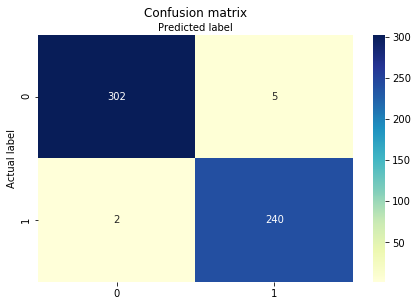

In [27]:
cnf_matrix = confusion_matrix(test_labels, predicted_labels)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
TP =cnf_matrix[0][0]
FP =cnf_matrix[0][1]
FN =cnf_matrix[1][0]
TN = cnf_matrix[1][1]
print('TP is : ', TP)
print('FP is : ', FP)
print('TN is : ', TN)
print('FN is : ', FN)

P=TP+FP
N=TN+FN
specificity=TN/N
sensitivity=TP/P
print('specificity is : ', specificity)
print('sensitivity is : ', sensitivity)

print('False Positive Rate (FPR) is : ', FP/N)
print('False Negative Rate (FNR) is : ', FN/P)
print('Negative Predictive Value (NPV) is : ', TN/(TN+FN))
print('False Discovery Rate (FDR) is : ', FP/(FP+TP))

TP is :  302
FP is :  5
TN is :  240
FN is :  2
specificity is :  0.9917355371900827
sensitivity is :  0.9837133550488599
False Positive Rate (FPR) is :  0.02066115702479339
False Negative Rate (FNR) is :  0.006514657980456026
Negative Predictive Value (NPV) is :  0.9917355371900827
False Discovery Rate (FDR) is :  0.016286644951140065


In [29]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(test_labels, predicted_labels)

0.9742301294183751

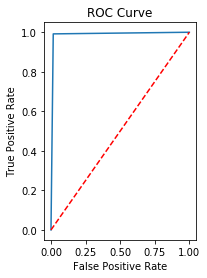

In [30]:
fpr, tpr, threshold = roc_curve(test_labels, predicted_labels)
plt.subplot(1,2,2)
sns.lineplot(fpr, tpr)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

1st max value of 1.000 occured at C=0.700


Text(0, 0.5, 'recall score')

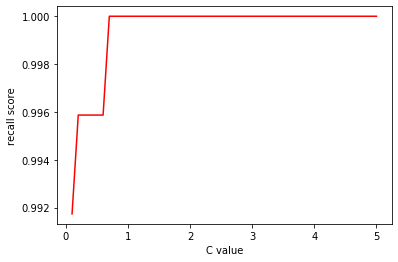

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(train_features, train_labels)
    lr_predict_loop_test = lr_model_loop.predict(test_features)
    recall_score = metrics.recall_score( test_labels, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-",color='r')
plt.xlabel("C value")
plt.ylabel("recall score")

In [32]:
from sklearn.linear_model import LogisticRegression
lr_object = LogisticRegression() 
lr_object.fit(train_features, train_labels)

predicted_labels = lr_object.predict(test_features)

print(classification_report(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       307
           1       0.98      1.00      0.99       242

    accuracy                           0.99       549
   macro avg       0.99      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549

0.9890710382513661
[[302   5]
 [  1 241]]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 257.44, 'Predicted label')

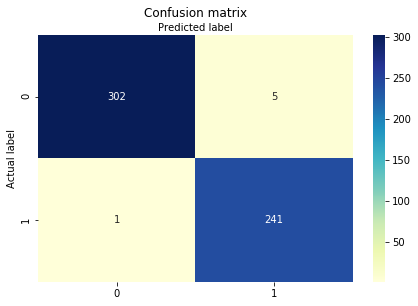

In [33]:
cnf_matrix = confusion_matrix(test_labels, predicted_labels)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
TP =cnf_matrix[0][0]
FP =cnf_matrix[0][1]
FN =cnf_matrix[1][0]
TN = cnf_matrix[1][1]
print('TP is : ', TP)
print('FP is : ', FP)
print('TN is : ', TN)
print('FN is : ', FN)

P=TP+FP
N=TN+FN
specificity=TN/N
sensitivity=TP/P
print('specificity is : ', specificity)
print('sensitivity is : ', sensitivity)

print('False Positive Rate (FPR) is : ', FP/N)
print('False Negative Rate (FNR) is : ', FN/P)
print('Negative Predictive Value (NPV) is : ', TN/(TN+FN))
print('False Discovery Rate (FDR) is : ', FP/(FP+TP))

TP is :  302
FP is :  5
TN is :  241
FN is :  1
specificity is :  0.9958677685950413
sensitivity is :  0.9837133550488599
False Positive Rate (FPR) is :  0.02066115702479339
False Negative Rate (FNR) is :  0.003257328990228013
Negative Predictive Value (NPV) is :  0.9958677685950413
False Discovery Rate (FDR) is :  0.016286644951140065


In [35]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(test_labels, predicted_labels)

0.9779764809042492

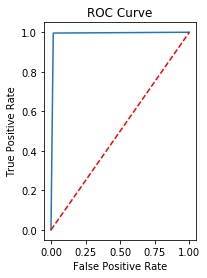

In [36]:
fpr, tpr, threshold = roc_curve(test_labels, predicted_labels)
plt.subplot(1,2,2)
sns.lineplot(fpr, tpr)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 70:30

In [37]:
train_features,test_features,train_labels,test_labels =train_test_split(features,labels,test_size=0.3,random_state=21) 

svc_object = svc(kernel='poly', degree=3) 
svc_object.fit(train_features, train_labels)

predicted_labels = svc_object.predict(test_features)

print(classification_report(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels)) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       235
           1       0.98      0.99      0.98       177

    accuracy                           0.99       412
   macro avg       0.98      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

[[231   4]
 [  2 175]]
0.9854368932038835


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 257.44, 'Predicted label')

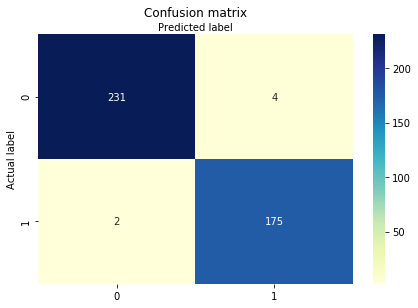

In [38]:
cnf_matrix = confusion_matrix(test_labels, predicted_labels)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
TP =cnf_matrix[0][0]
FP =cnf_matrix[0][1]
FN =cnf_matrix[1][0]
TN = cnf_matrix[1][1]
print('TP is : ', TP)
print('FP is : ', FP)
print('TN is : ', TN)
print('FN is : ', FN)

P=TP+FP
N=TN+FN
specificity=TN/N
sensitivity=TP/P
print('specificity is : ', specificity)
print('sensitivity is : ', sensitivity)

print('False Positive Rate (FPR) is : ', FP/N)
print('False Negative Rate (FNR) is : ', FN/P)
print('Negative Predictive Value (NPV) is : ', TN/(TN+FN))
print('False Discovery Rate (FDR) is : ', FP/(FP+TP))

TP is :  231
FP is :  4
TN is :  175
FN is :  2
specificity is :  0.9887005649717514
sensitivity is :  0.9829787234042553
False Positive Rate (FPR) is :  0.022598870056497175
False Negative Rate (FNR) is :  0.00851063829787234
Negative Predictive Value (NPV) is :  0.9887005649717514
False Discovery Rate (FDR) is :  0.01702127659574468


In [40]:
matthews_corrcoef(test_labels, predicted_labels)

0.9703737372657699

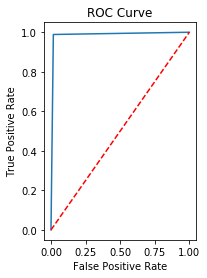

In [41]:
fpr, tpr, threshold = roc_curve(test_labels, predicted_labels)
plt.subplot(1,2,2)
sns.lineplot(fpr, tpr)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

1st max value of 0.994 occured at C=0.200


Text(0, 0.5, 'recall score')

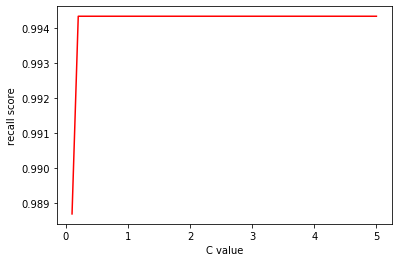

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(train_features, train_labels)
    lr_predict_loop_test = lr_model_loop.predict(test_features)
    recall_score = metrics.recall_score( test_labels, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-",color='r')
plt.xlabel("C value")
plt.ylabel("recall score")

In [43]:
from sklearn.linear_model import LogisticRegression
lr_object = LogisticRegression() 
lr_object.fit(train_features, train_labels)

predicted_labels = lr_object.predict(test_features)

print(classification_report(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       235
           1       0.98      0.99      0.99       177

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

0.9902912621359223
[[232   3]
 [  1 176]]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 257.44, 'Predicted label')

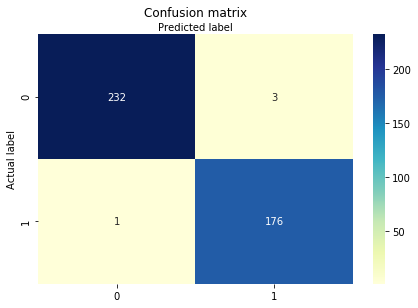

In [44]:
cnf_matrix = confusion_matrix(test_labels, predicted_labels)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
TP =cnf_matrix[0][0]
FP =cnf_matrix[0][1]
FN =cnf_matrix[1][0]
TN = cnf_matrix[1][1]
print('TP is : ', TP)
print('FP is : ', FP)
print('TN is : ', TN)
print('FN is : ', FN)

P=TP+FP
N=TN+FN
specificity=TN/N
sensitivity=TP/P
print('specificity is : ', specificity)
print('sensitivity is : ', sensitivity)

print('False Positive Rate (FPR) is : ', FP/N)
print('False Negative Rate (FNR) is : ', FN/P)
print('Negative Predictive Value (NPV) is : ', TN/(TN+FN))
print('False Discovery Rate (FDR) is : ', FP/(FP+TP))

TP is :  232
FP is :  3
TN is :  176
FN is :  1
specificity is :  0.9943502824858758
sensitivity is :  0.9872340425531915
False Positive Rate (FPR) is :  0.01694915254237288
False Negative Rate (FNR) is :  0.00425531914893617
Negative Predictive Value (NPV) is :  0.9943502824858758
False Discovery Rate (FDR) is :  0.01276595744680851


In [46]:
matthews_corrcoef(test_labels, predicted_labels)

0.9802654654928401

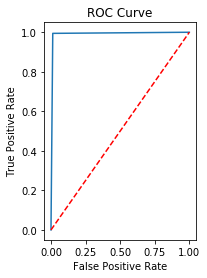

In [47]:
fpr, tpr, threshold = roc_curve(test_labels, predicted_labels)
plt.subplot(1,2,2)
sns.lineplot(fpr, tpr)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [48]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

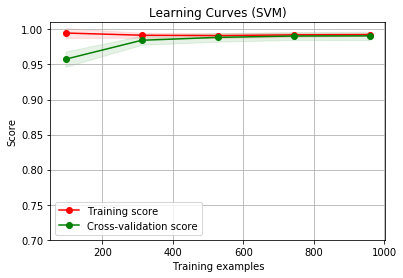

In [52]:
title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = svc(kernel='poly', degree=3) 
plot_learning_curve(estimator, title, features, labels, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

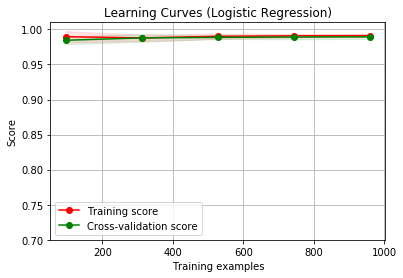

In [50]:
title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = LogisticRegression() 
plot_learning_curve(estimator, title, features, labels, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()